In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, skewnorm

In [7]:
mu = np.array([4, 2])
C = np.array([[1.44, -0.702], [-0.702, 0.81]])

In [16]:
N = 100
xx = np.linspace(-1, 9, N)
yy = np.linspace(0, 4, N)
Z = np.meshgrid(xx, yy)
zz = np.empty((N, N, 2))
zz[...,0] = Z[0]
zz[...,1] = Z[1]
# multivariate... vuole che la componente stia nell'ultimo indice

In [28]:
a = multivariate_normal.pdf(zz, mu, C)

t = 30*np.pi/180
R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
b = multivariate_normal(np.array([3, 3]), R @ C/3).pdf(zz)

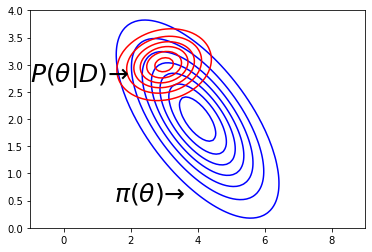

In [78]:
plt.contour(Z[0], Z[1], a, colors = 'blue') # , label = r'$\pi(\theta)$'
plt.contour(Z[0], Z[1], b, colors = 'red') # , label = r'$P(\theta|D)$'
plt.annotate(r'$\pi(\theta) \to$', (1.5, 0.5), size = 25)
plt.annotate(r'$P(\theta|D) \to$', (-1, 2.7), size = 25)
plt.savefig('./prior_vs_posterior.pdf');

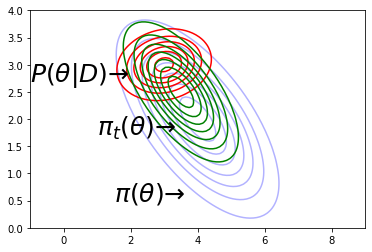

In [79]:
t2 = 7
R2 = np.array([[np.cos(t), -np.sin(t2)], [np.sin(t2), np.cos(t2)]])
c = multivariate_normal(np.array([3.5, 2.5]), C / 2).pdf(zz) # R2 @ C/3

plt.contour(Z[0], Z[1], a, colors = 'blue', alpha = 0.3)
plt.contour(Z[0], Z[1], b, colors = 'red')
plt.contour(Z[0], Z[1], c, colors = 'green')
plt.annotate(r'$\pi(\theta) \to$', (1.5, 0.5), size = 25)
plt.annotate(r'$P(\theta|D) \to$', (-1, 2.7), size = 25)
plt.annotate(r'$\pi_t(\theta) \to$', (1., 1.7), size = 25)
plt.savefig('./prior_vs_posterior_with_pi_t.pdf');

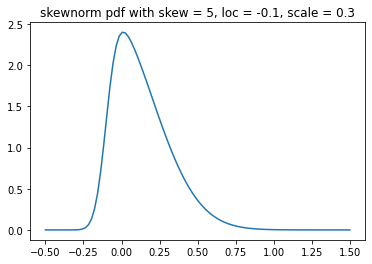

In [8]:
x = np.linspace(-0.5, 1.5, 100)
y = skewnorm.pdf(x, 5.0, loc = -0.1, scale = 0.3)
plt.plot(x, y)
plt.title('skewnorm pdf with skew = 5, loc = -0.1, scale = 0.3')
plt.savefig('./skewnorm.pdf')